<a href="https://colab.research.google.com/github/czokw1/ml-predict-bank-deposit/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Project Description

Abstract: The data is related to marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will take a bank deposit (variable target).


#### Import libraries

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# models trainng

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from imblearn.over_sampling import SMOTE

# models validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve,confusion_matrix,classification_report

from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


####Load Data

In [61]:
#dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS/Project/data/bank-full.csv',sep=';')

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS/Project/data/bank-additional-full.csv',sep=';')

In [62]:
dataset.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
23762,43,admin.,married,university.degree,no,yes,no,cellular,aug,thu,24,13,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
17541,49,technician,married,professional.course,no,yes,no,cellular,jul,mon,534,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2979,59,retired,married,professional.course,unknown,yes,no,telephone,may,wed,125,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
30325,30,admin.,single,university.degree,no,no,no,cellular,apr,thu,69,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
36238,33,admin.,married,university.degree,no,yes,no,cellular,jun,mon,346,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,no
28638,39,management,single,university.degree,unknown,yes,no,telephone,apr,thu,75,2,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1,no
9056,48,blue-collar,married,basic.4y,no,no,no,telephone,jun,thu,240,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
6548,25,management,single,university.degree,no,yes,no,telephone,may,wed,126,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10752,41,management,married,basic.6y,no,no,yes,telephone,jun,tue,271,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
20525,50,admin.,married,university.degree,no,yes,no,cellular,aug,tue,304,8,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [63]:
#Update y variable to int type
dataset['y'].replace({'yes':1,'no':0},inplace=True)

In [64]:
#Rename y variable to 'target'
dataset.rename({'y':'target'},axis=1, inplace=True)

In [65]:
dataset.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
19038,48,management,married,high.school,unknown,no,no,cellular,aug,tue,135,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,0
31095,25,student,single,basic.9y,no,no,yes,cellular,may,wed,219,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,0
21783,39,management,divorced,university.degree,no,no,no,cellular,aug,wed,649,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,1
4668,49,blue-collar,married,basic.9y,unknown,no,yes,telephone,may,wed,554,3,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
24304,54,services,married,high.school,no,yes,no,telephone,nov,mon,56,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
13693,33,admin.,single,high.school,no,yes,no,telephone,jul,thu,180,6,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
25583,29,management,married,basic.9y,no,yes,no,cellular,nov,wed,103,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
32258,36,services,single,basic.9y,no,yes,no,cellular,may,fri,501,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,1
9444,40,admin.,married,university.degree,no,yes,no,telephone,jun,fri,606,5,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0
28473,34,admin.,single,university.degree,no,yes,yes,cellular,apr,tue,441,2,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0


#Exploratory data analysis

##Attribute information:

 Input variables:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   8 - contact: contact communication type (categorical: "cellular","telephone") 

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
 
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):

  21 - target - has the client subscribed a term deposit? (binary: "yes","no")

##Checking data type of variables

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##Checking if there are any missing values

In [67]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

##Checking descriptive statistics

In [68]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


##Unique values per column

In [69]:
for column in dataset.columns:
  print(f'{column} --> {len(dataset[column].unique())}')
  print(f'{dataset[column].unique()}')
  print()

age --> 78
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

job --> 12
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital --> 4
['married' 'single' 'divorced' 'unknown']

education --> 8
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default --> 3
['no' 'unknown' 'yes']

housing --> 3
['no' 'yes' 'unknown']

loan --> 3
['no' 'yes' 'unknown']

contact --> 2
['telephone' 'cellular']

month --> 10
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week --> 5
['mon' 'tue' 'wed' 'thu' 'fri']

duration --> 1544
[ 261  149  226 ... 1246 1556 1868]

campaign --> 42
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 

##Checking correlation between variables

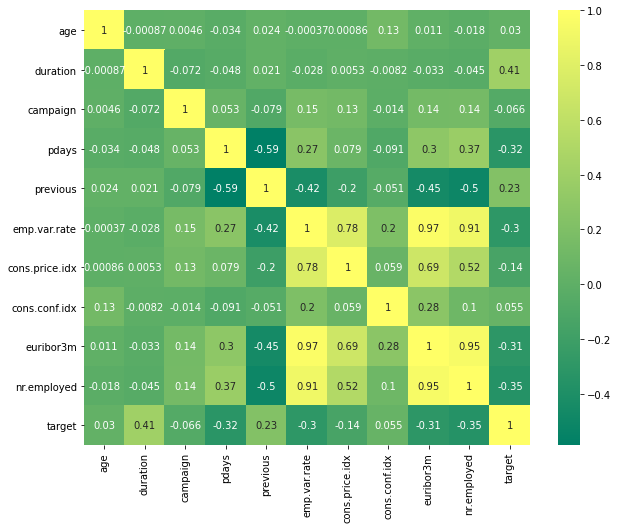

In [70]:
corr = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='summer');

##Checking ratio target variable

Target variable

In [71]:
dataset['target'].value_counts()/dataset.shape[0]

0    0.887346
1    0.112654
Name: target, dtype: float64

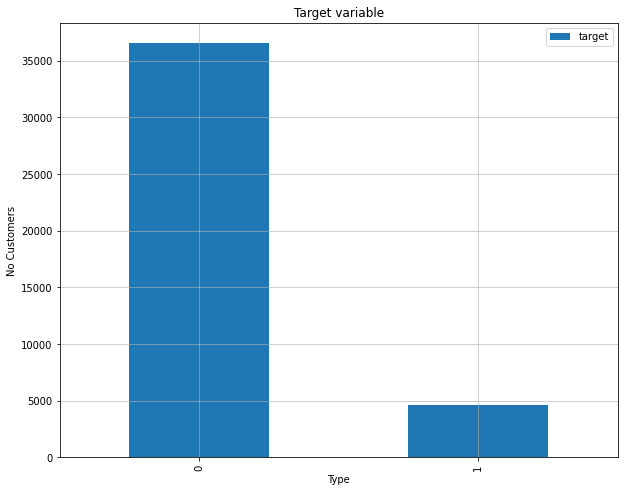

In [72]:
plt.figure(figsize=(10,8))
dataset['target'].value_counts().plot(kind='bar')
plt.title('Target variable')
plt.ylabel('No Customers')
plt.xlabel('Type')
plt.legend()
plt.grid(axis='both', alpha=0.75);

Conculsion

Out dataset is highly impbalaced. There are only 11% of customers who have aleardy taken a bank term offer.


##Checking variables 

 Variables

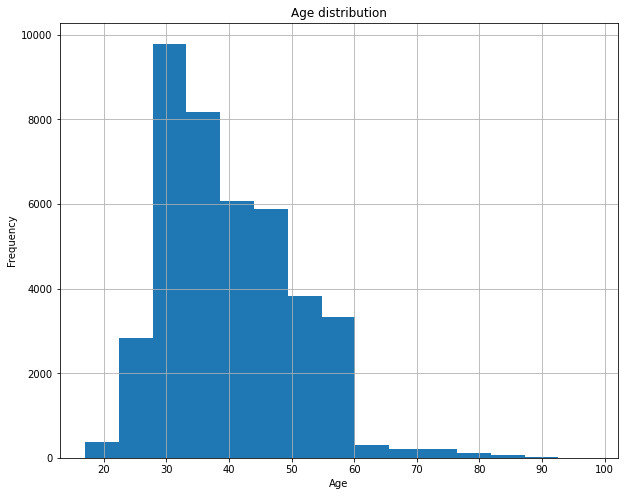

In [73]:
plt.figure(figsize=(10,8))
dataset['age'].hist(bins=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution');

###Plotting variables to check thier distribiution

In [74]:
def plot_variables(var):
  order = dataset[var].value_counts().index
  plt.figure(figsize=(10,8))
  sns.countplot(y=var,data=dataset,order=order)
  plt.title(f'{var} distribution'.capitalize())
  plt.xlabel('No Customers'.capitalize())
  plt.ylabel(f'{var} Type'.capitalize());

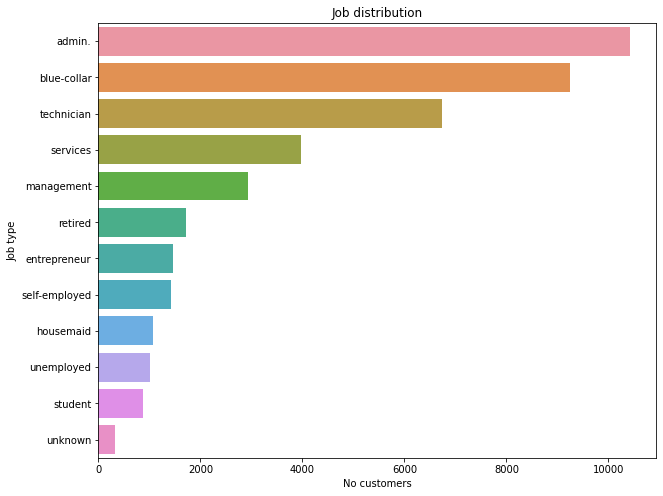

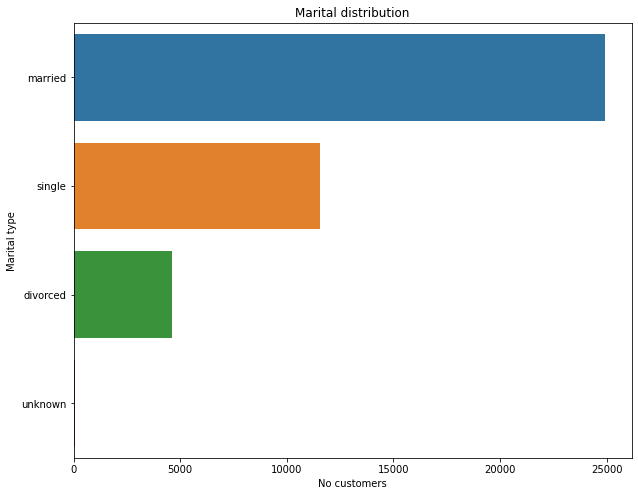

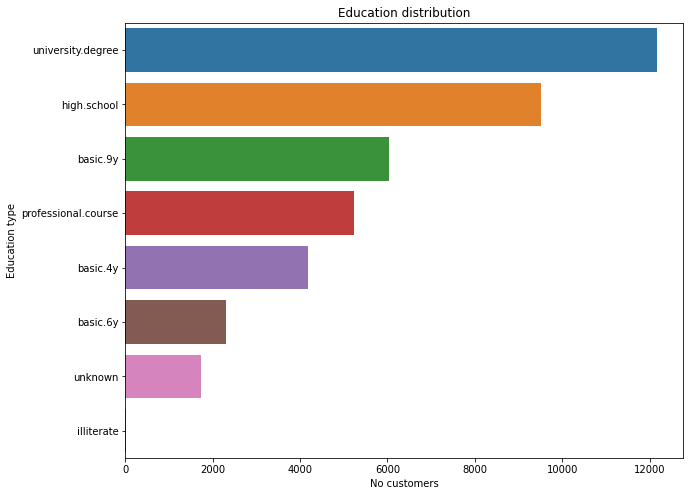

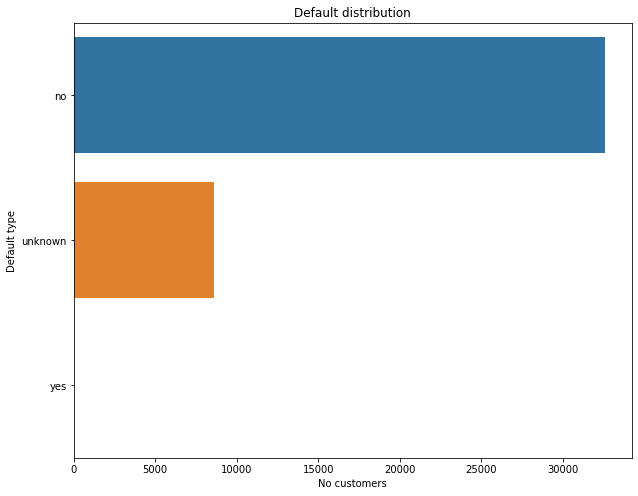

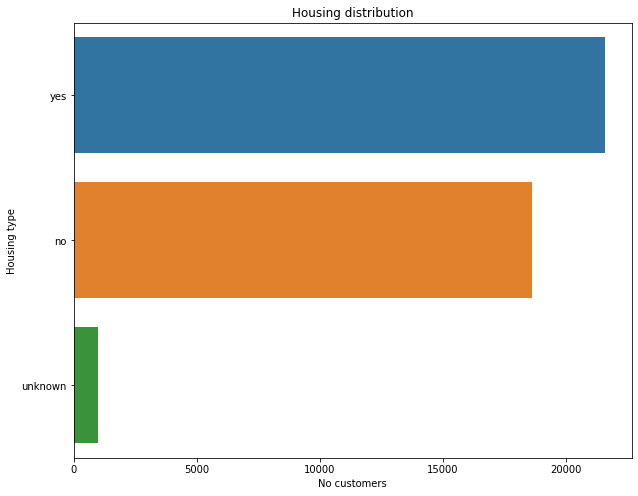

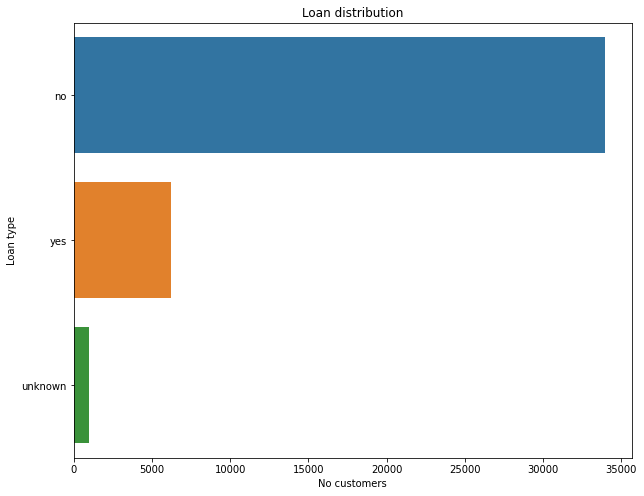

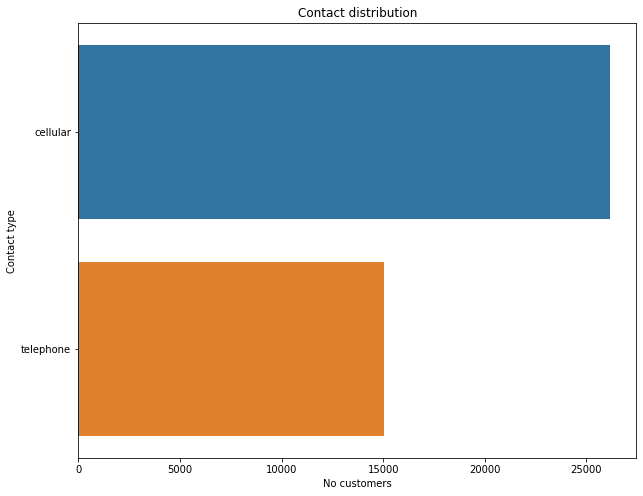

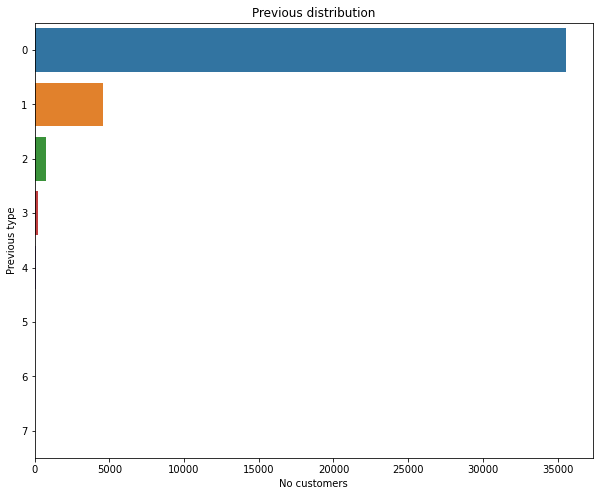

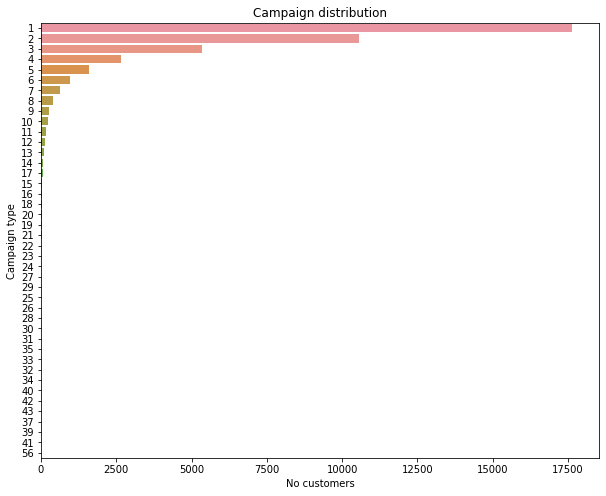

In [75]:
dataset.columns
vars = ['job', 'marital', 'education', 'default', 'housing','loan','contact','previous','campaign']

[plot_variables(var) for var in vars];

###Plotting variables by target

In [76]:
def plot_variablesByTarget(var,target):
  order = dataset[var].value_counts().index
  plt.figure(figsize=(10,8))
  sns.countplot(y=var,hue=target,data=dataset,order=order)
  plt.title(f'{var} distribution divided by target variable'.capitalize())
  plt.xlabel('No Customers'.capitalize())
  plt.ylabel(f'{var} Type'.capitalize());

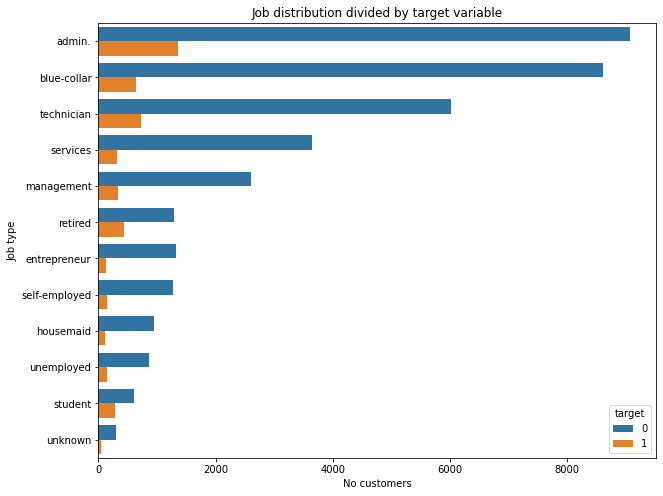

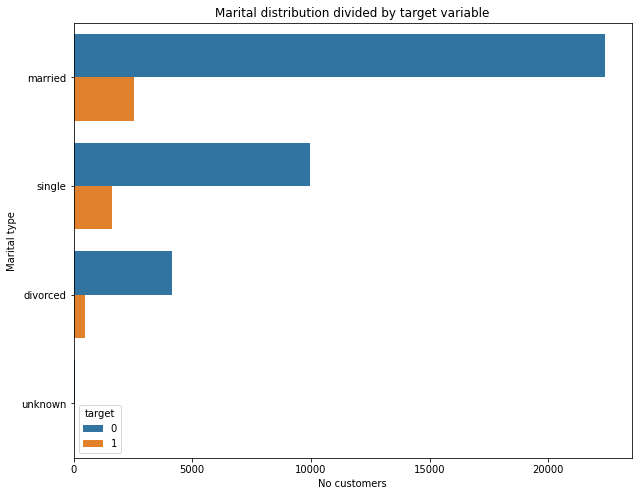

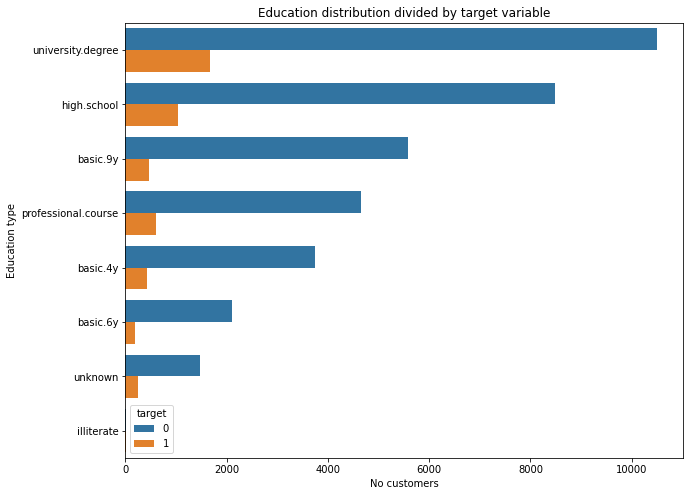

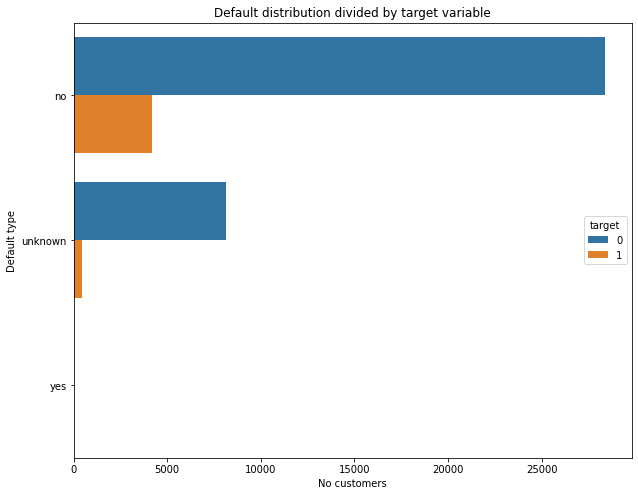

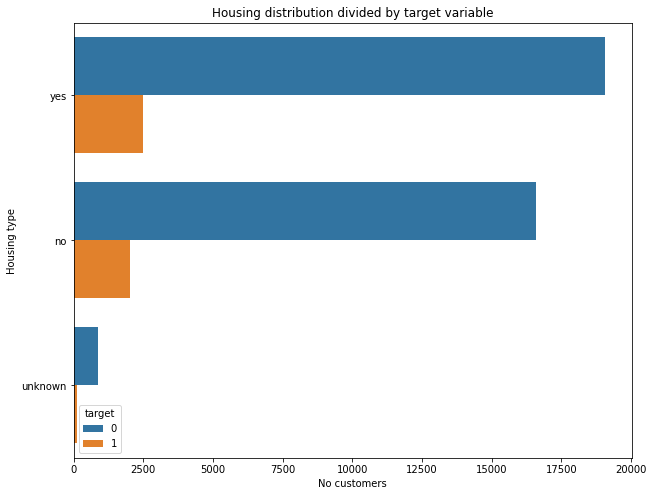

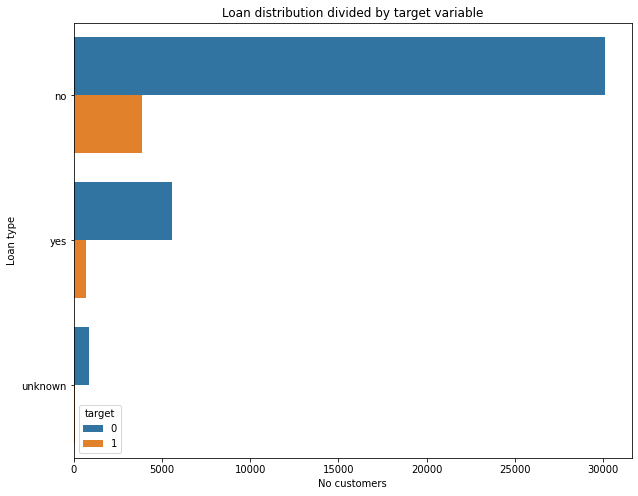

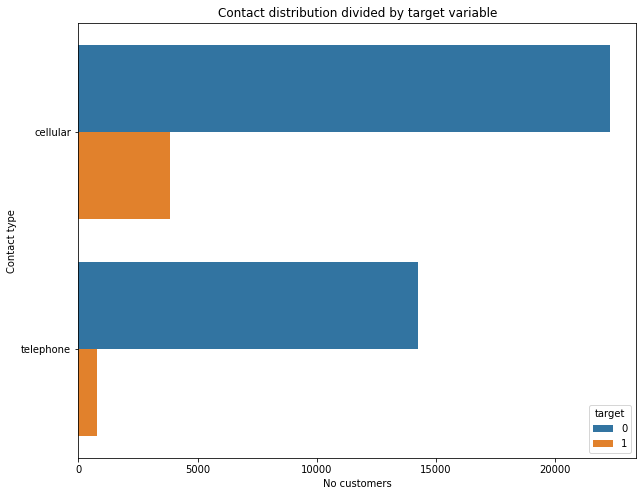

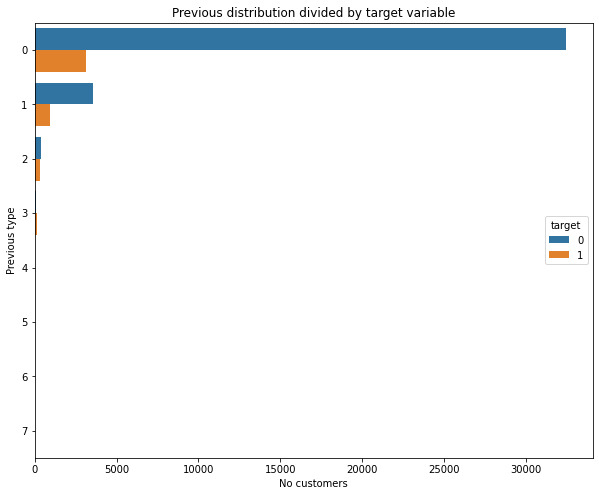

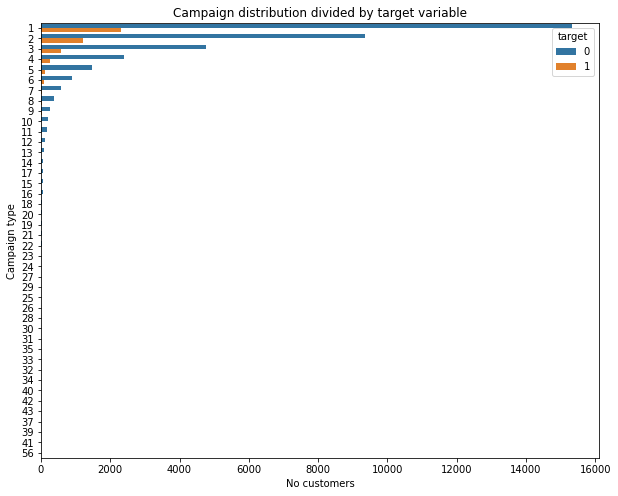

In [77]:
vars = ['job', 'marital', 'education', 'default', 'housing','loan','contact','previous','campaign']

[plot_variablesByTarget(var,'target') for var in vars];

###Checking variables divided by type

In [78]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

Numeric columns

In [79]:
numeric_columns =  dataset.select_dtypes(include=np.number).columns

numeric_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'target'],
      dtype='object')

Non numeric columns

In [80]:
non_numeric_columns = dataset.select_dtypes(exclude=np.number).columns

non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [81]:
def plot_num_variablesByType(): 
  for column in numeric_columns:

    print(f'Column name: {column}')
    print(f'Unique values: {len(dataset[column].unique())}')
    dataset[column].plot.hist(bins=20)
    plt.show()

Plotting numeric columns

Column name: age
Unique values: 78


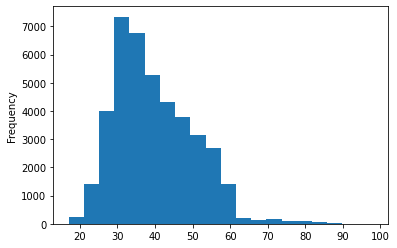

Column name: duration
Unique values: 1544


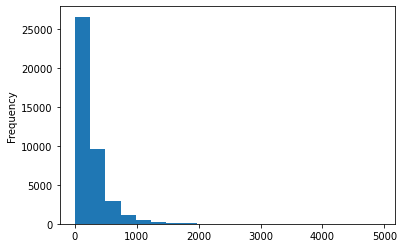

Column name: campaign
Unique values: 42


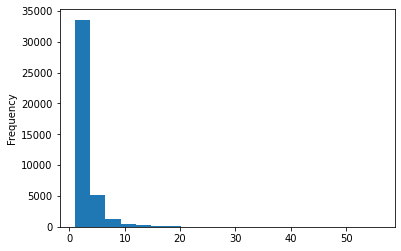

Column name: pdays
Unique values: 27


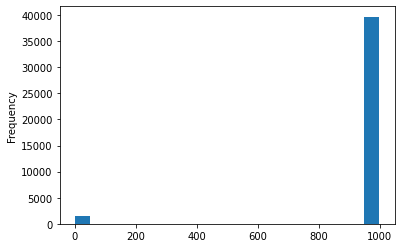

Column name: previous
Unique values: 8


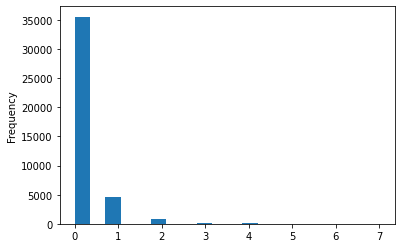

Column name: emp.var.rate
Unique values: 10


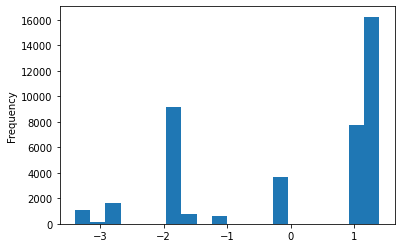

Column name: cons.price.idx
Unique values: 26


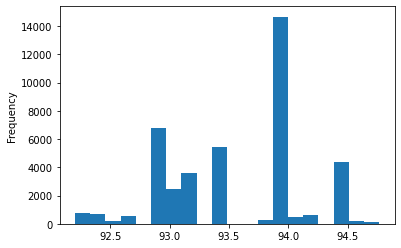

Column name: cons.conf.idx
Unique values: 26


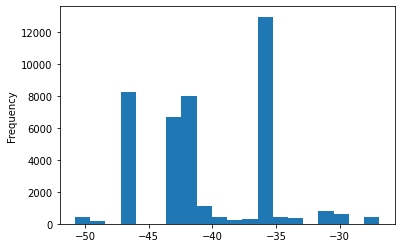

Column name: euribor3m
Unique values: 316


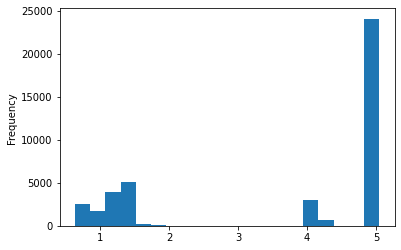

Column name: nr.employed
Unique values: 11


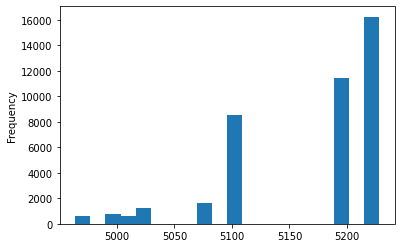

Column name: target
Unique values: 2


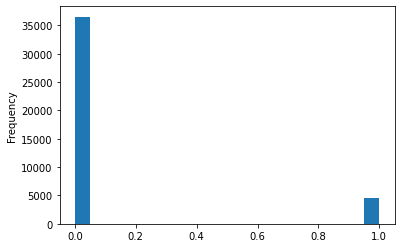

In [82]:
plot_num_variablesByType()

Plotting non numeric columns

In [83]:
def plot_non_num_variablesByType():
  for column in non_numeric_columns:
    print(f'Column name: {column}')
    print(f'Unique values:{len(dataset[column].unique())}')
    dataset[column].value_counts().plot.bar()
    plt.show()

Column name: job
Unique values:12


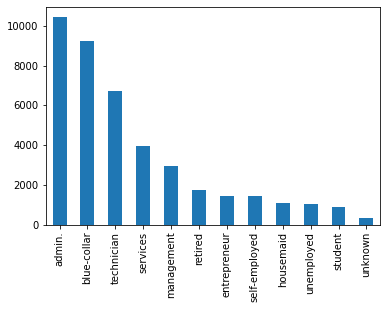

Column name: marital
Unique values:4


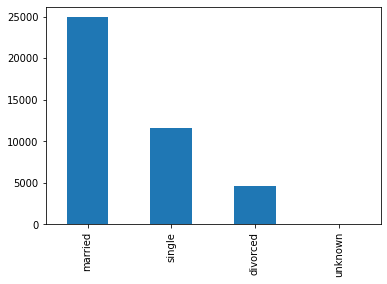

Column name: education
Unique values:8


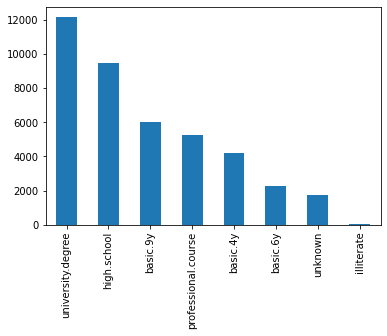

Column name: default
Unique values:3


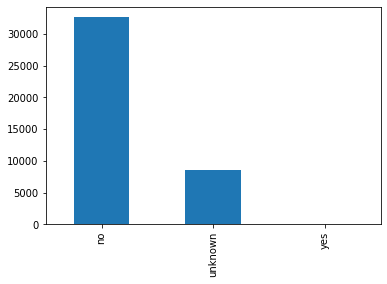

Column name: housing
Unique values:3


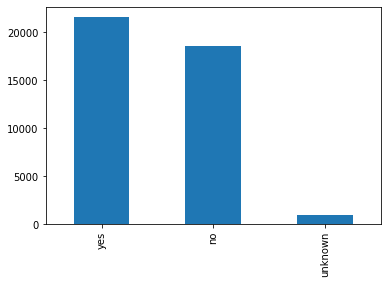

Column name: loan
Unique values:3


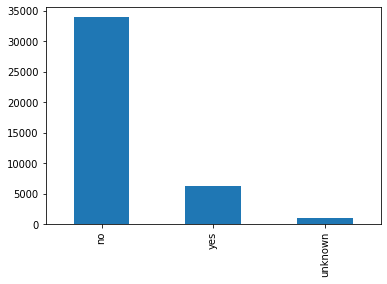

Column name: contact
Unique values:2


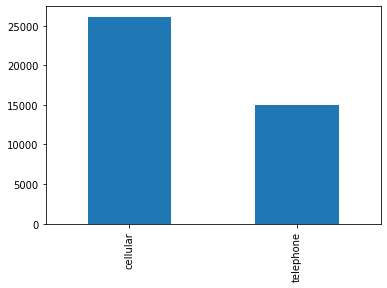

Column name: month
Unique values:10


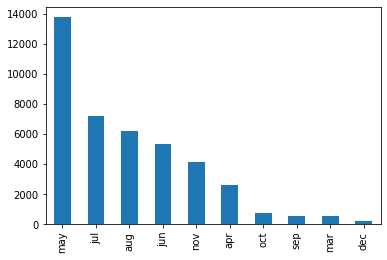

Column name: day_of_week
Unique values:5


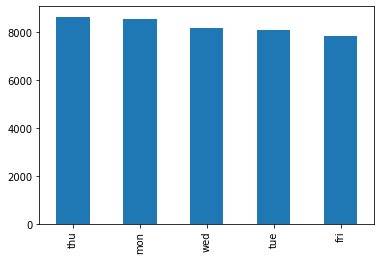

Column name: poutcome
Unique values:3


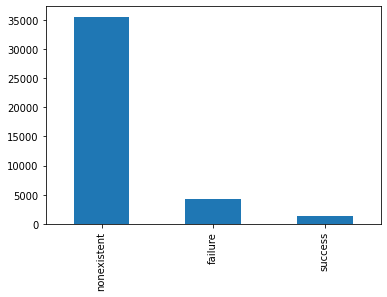

In [84]:
plot_non_num_variablesByType()

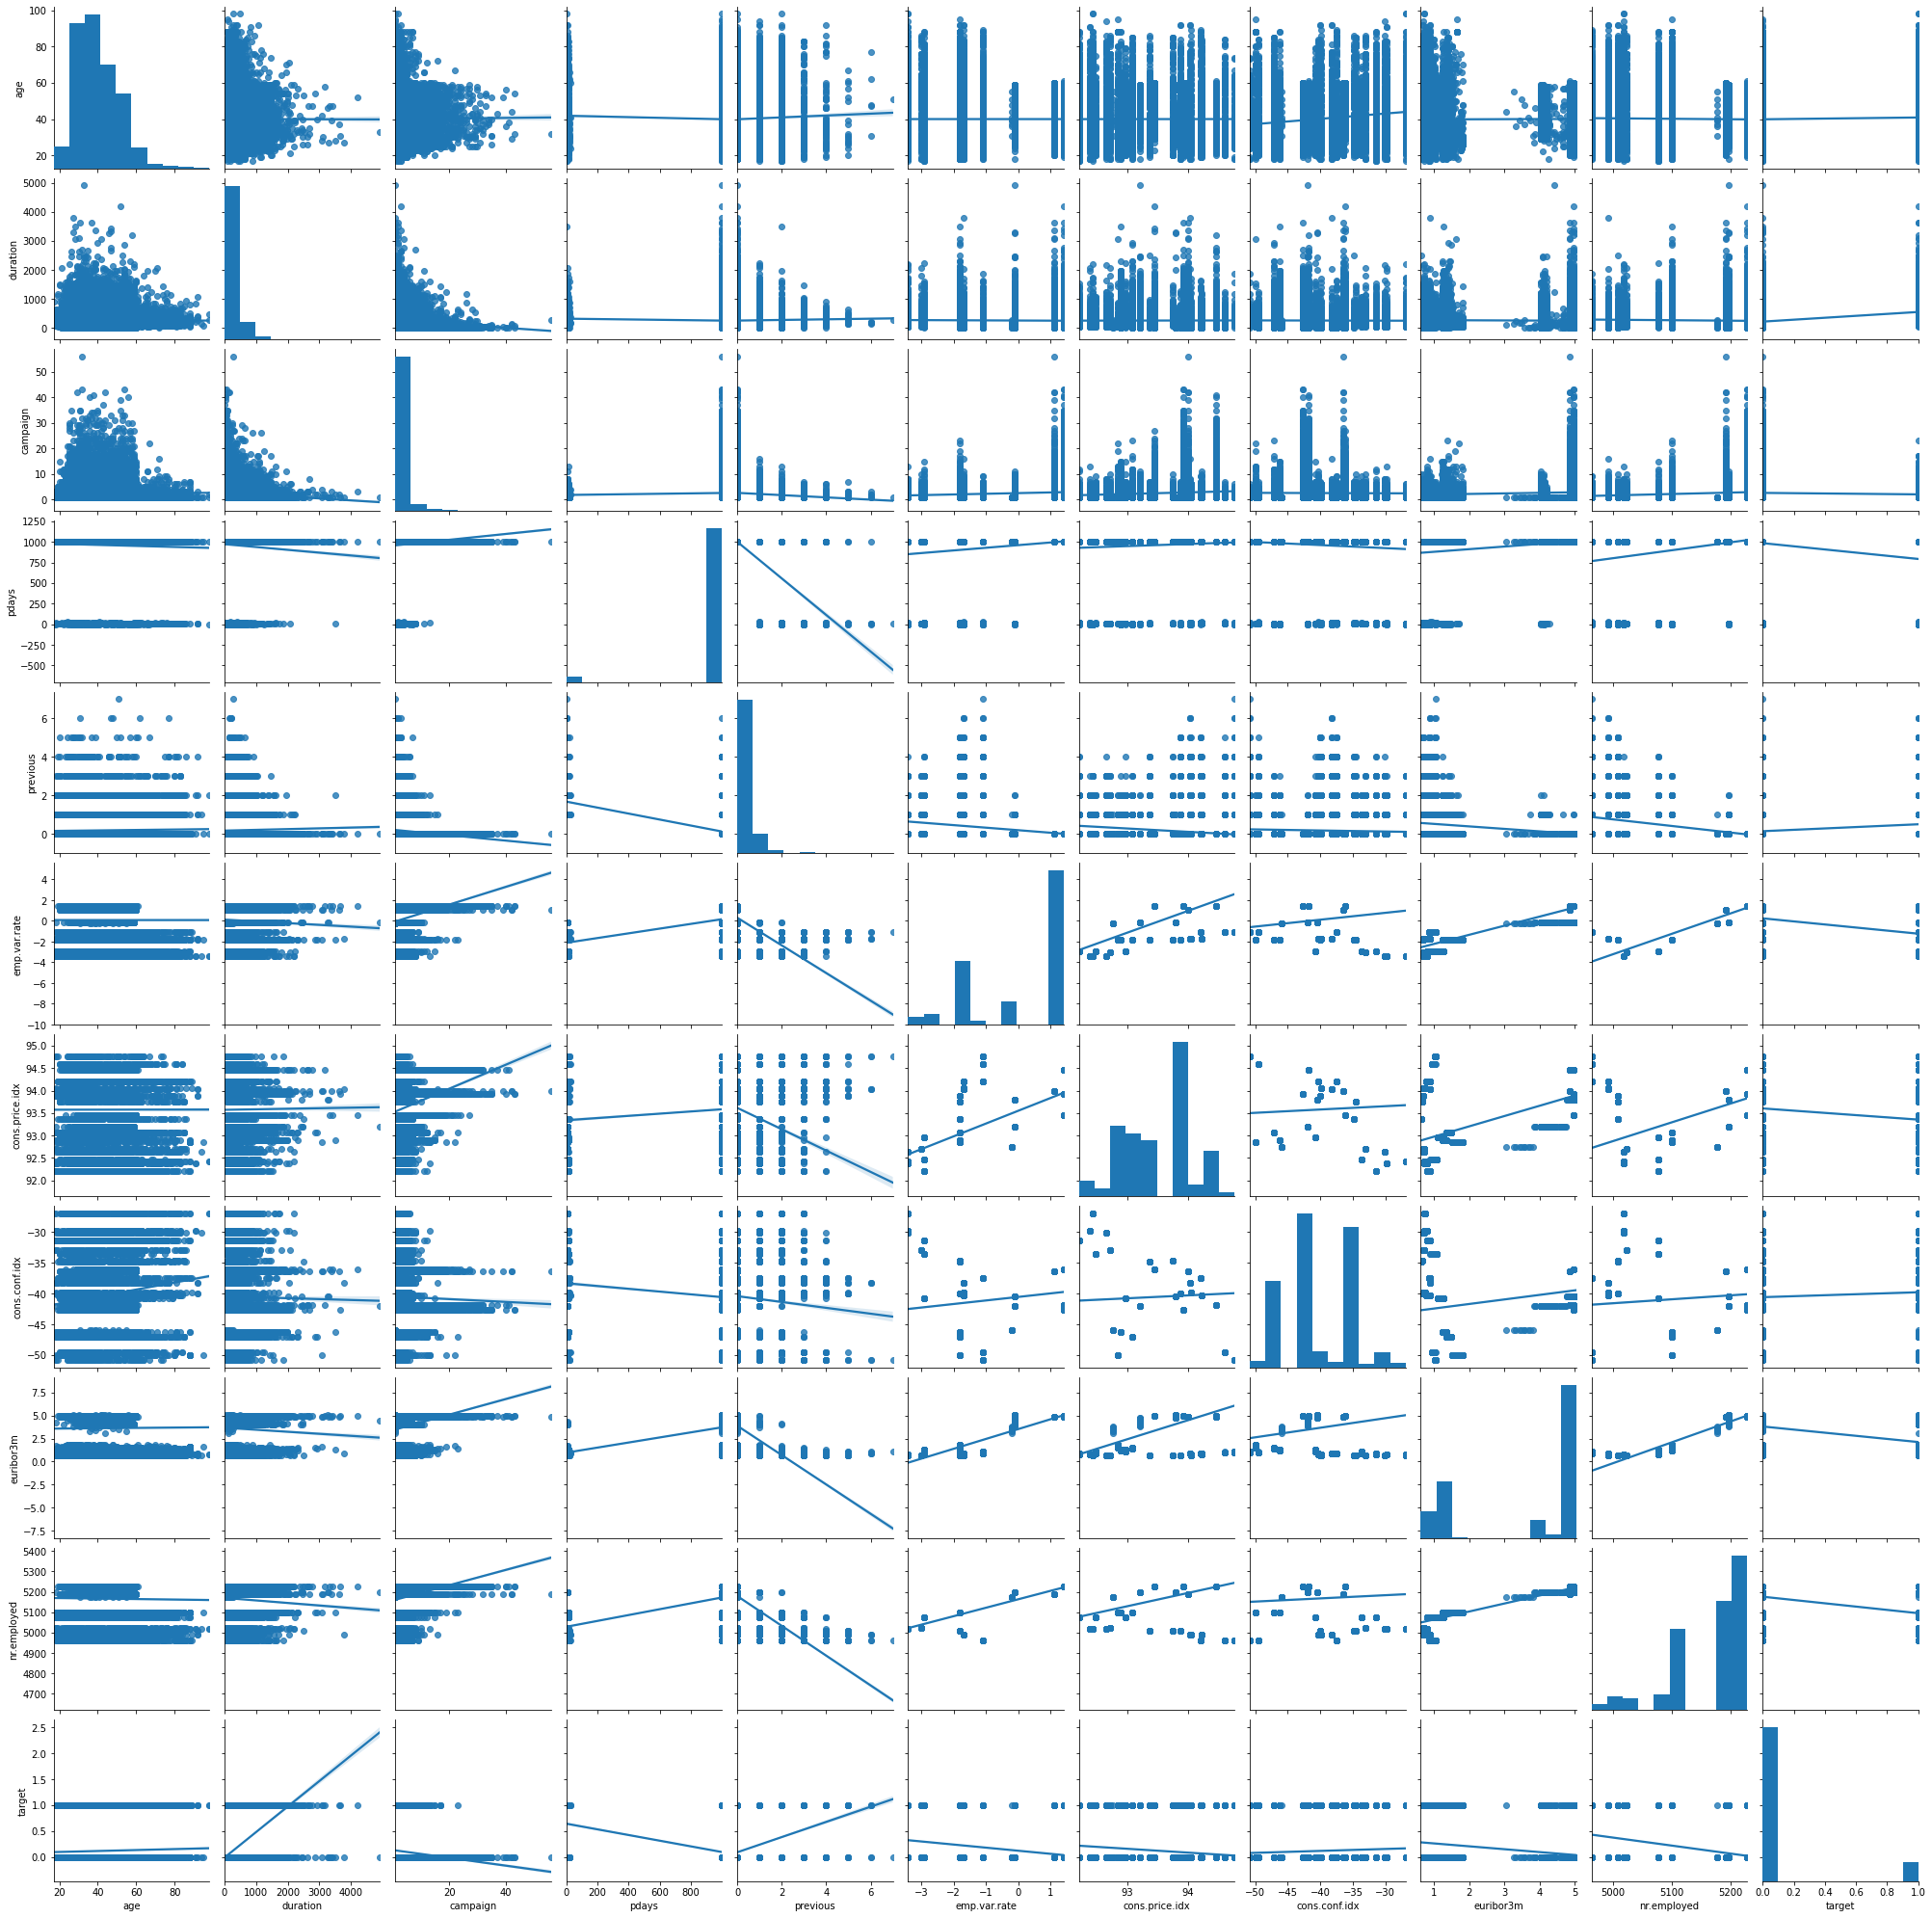

In [31]:
## mutual dependencies

df_numeric = dataset.select_dtypes(include=np.number)

sns.pairplot(data=df_numeric,kind='reg')

plt.show()

Conclusions:
* binary columns such as loan, housing, default should be turned to 0-1
* categorical columns should be encoded using one-hot encoding
* columns that should be removed: pdays, previous

#Data Preperation

Categorical Columns

Checking how does look like distribution of each category

In [88]:
non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [99]:
for column in non_numeric_columns:
  print(f'Column name: {column}')
  print()
  print(dataset[column].value_counts())
  print()
  print("Category share (%)")
  print(dataset[column].value_counts()/dataset['job'].count()*100)
  print()

Column name: job

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Category share (%)
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64

Column name: marital

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Category share (%)
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64

Column name: education

university.degree      121

#### Converting categorical attributes into numbers

In [101]:
dataset.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
15818,31,blue-collar,single,basic.4y,unknown,yes,no,cellular,jul,mon,153,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
10917,56,blue-collar,married,basic.4y,unknown,no,no,telephone,jun,wed,36,4,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
8293,26,blue-collar,single,high.school,no,no,no,telephone,jun,tue,185,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
39476,85,housemaid,married,basic.4y,unknown,yes,no,cellular,apr,tue,167,1,6,2,success,-1.8,93.749,-34.6,0.642,5008.7,1
21683,38,admin.,married,university.degree,unknown,yes,no,cellular,aug,tue,173,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0


In [102]:
dataset['default'].replace({'no':0,'yes':1},inplace=True)

In [103]:
dataset['housing'].replace({'no':0,'yes':1},inplace=True)

In [104]:
dataset['loan'].replace({'no':0,'yes':1},inplace=True)

# Data Cleaning

Remove unknown values as they make same noise only

In [106]:
dataset.shape

(41188, 21)

In [110]:
dataset = dataset[dataset['job']!='unknown']

In [111]:
dataset.shape

(40858, 21)

In [112]:
dataset = dataset[dataset['marital']!='unknown']

In [113]:
dataset.shape

(40787, 21)

In [114]:
dataset = dataset[dataset['housing']!='unknown']

In [115]:
dataset.shape

(39803, 21)

In [116]:
dataset = dataset[dataset['loan']!='unknown']

In [117]:
dataset.shape

(39803, 21)

In [128]:
dataset = dataset[dataset['education']!='unknown']

#### Drop not used columns

In [129]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   campaign        38245 non-null  int64  
 10  pdays           38245 non-null  int64  
 11  previous        38245 non-null  int64  
 12  poutcome        38245 non-null  object 
 13  emp.var.rate    38245 non-null  float64
 14  cons.price.idx  38245 non-null  float64
 15  cons.conf.idx   38245 non-null  float64
 16  euribor3m       38245 non-null  float64
 17  nr.employed     38245 non-null 

In [120]:
#dataset.drop([ 'duration','pdays','previous','poutcome','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed'  ],axis=1,inplace=True)
dataset.drop([ 'duration','default'  ],axis=1,inplace=True)

In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   campaign        38245 non-null  int64  
 10  pdays           38245 non-null  int64  
 11  previous        38245 non-null  int64  
 12  poutcome        38245 non-null  object 
 13  emp.var.rate    38245 non-null  float64
 14  cons.price.idx  38245 non-null  float64
 15  cons.conf.idx   38245 non-null  float64
 16  euribor3m       38245 non-null  float64
 17  nr.employed     38245 non-null 

#Feature Engineering

Let check if we are able to simplify a bit our categories

In [131]:
for column in dataset.select_dtypes(exclude=np.number).columns:
  print(dataset[column].value_counts())
  print() 

admin.           9937
blue-collar      8560
technician       6380
services         3716
management       2728
retired          1577
entrepreneur     1360
self-employed    1349
housemaid         987
unemployed        963
student           688
Name: job, dtype: int64

married     23183
single      10760
divorced     4302
Name: marital, dtype: int64

university.degree      11821
high.school             9244
basic.9y                5856
professional.course     5100
basic.4y                4002
basic.6y                2204
illiterate                18
Name: education, dtype: int64

1    20578
0    17667
Name: housing, dtype: int64

0    32286
1     5959
Name: loan, dtype: int64

cellular     24441
telephone    13804
Name: contact, dtype: int64

may    12794
jul     6630
aug     5822
jun     4846
nov     3898
apr     2436
oct      659
sep      502
mar      497
dec      161
Name: month, dtype: int64

thu    8011
mon    7927
wed    7602
tue    7481
fri    7224
Name: day_of_week, dtype: int64



In [134]:
dataset['education'].replace({'basic.9y':'basic','basic.4y':'basic','basic.6y':'basic'}, inplace=True)

dataset['job'].replace({'technician':'tech-services','services':'tech-services',
                        'entrepreneur':'self-employed','admin.':'admin&management'
                        ,'management':'admin&management','retired':'non-active','unemployed':'non-active'},inplace=True)

dataset['marital'].replace({'divorced':'single'},inplace=True)



In [135]:
for column in dataset.select_dtypes(exclude=np.number).columns:
  print(dataset[column].value_counts())
  print() 

admin&management    12665
tech-services       10096
blue-collar          8560
self-employed        2709
non-active           2540
housemaid             987
student               688
Name: job, dtype: int64

married    23183
single     15062
Name: marital, dtype: int64

basic                  12062
university.degree      11821
high.school             9244
professional.course     5100
illiterate                18
Name: education, dtype: int64

1    20578
0    17667
Name: housing, dtype: int64

0    32286
1     5959
Name: loan, dtype: int64

cellular     24441
telephone    13804
Name: contact, dtype: int64

may    12794
jul     6630
aug     5822
jun     4846
nov     3898
apr     2436
oct      659
sep      502
mar      497
dec      161
Name: month, dtype: int64

thu    8011
mon    7927
wed    7602
tue    7481
fri    7224
Name: day_of_week, dtype: int64

nonexistent    33066
failure         3936
success         1243
Name: poutcome, dtype: int64



Conclusion

In our dataset there are two columns which should have been taken into account more precisely as they can help us identify customers into new and existing.

Column **poutcome** as outcome of the previous marketing campaign and column **pdays** as number of days that passed by after the client was last contacted from a previous campaign

In [140]:
poutcome = dataset['poutcome'].value_counts()
poutcome['nonexistent']

33066

In [141]:
pdays = dataset['pdays'].value_counts()[:5]
pdays[999]

36879

In [142]:
poutcome['nonexistent']-pdays[999]

-3813

The quantity of new customers shoudl be equal compering poutcome and pdays. Let's check what could happened that makes differences

As we assumed that pdays '999' is related to new customers data, we could check if there are other values in poutcome where '999' is assigned 

In [146]:
dataset['poutcome'].loc[(dataset['pdays']==999)&(dataset['poutcome']!='nonexistent')].value_counts()

failure    3813
Name: poutcome, dtype: int64

There 3813 itmes in out dataset that have wrongly assigned category to pdays

As these items have wrongly assigned pdays to '999' let's replace this with NAN values

In [155]:
indexes = dataset.loc[(dataset['pdays']==999)&(dataset['poutcome']!='nonexistent')]['pdays'].index.values
indexes

array([24019, 24076, 24102, ..., 41170, 41173, 41187])

In [159]:
dataset.loc[indexes,'pdays'] = np.nan

As these NAN values is about 10% of data, we can drop missing values to get more accurate predictions 

In [167]:
dataset.shape

(38245, 19)

In [168]:
dataset = dataset.dropna()

In [169]:
dataset.shape

(34432, 19)

In [170]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'target'],
      dtype='object')

#Modeling

Before we start doing predictions we have to convert categorical variabels into numbers

In [171]:
dataset = pd.get_dummies(data=dataset,prefix_sep='_',drop_first=True)

In [172]:
dataset.sample(10)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,job_blue-collar,job_housemaid,job_non-active,job_self-employed,job_student,job_tech-services,marital_single,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_1,loan_1,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
14715,46,4,999.0,0,1.4,93.918,-42.7,4.961,5228.1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
9154,48,1,999.0,0,1.4,94.465,-41.8,4.967,5228.1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
30016,23,5,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
12150,54,1,999.0,0,1.4,93.918,-42.7,4.955,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
23121,40,2,999.0,0,1.4,93.444,-36.1,4.965,5228.1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
21970,41,2,999.0,0,1.4,93.444,-36.1,4.964,5228.1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
12453,30,4,999.0,0,1.4,93.918,-42.7,4.960,5228.1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
9059,35,31,999.0,0,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
40114,73,1,999.0,0,-1.7,94.215,-40.3,0.835,4991.6,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
749,31,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [ ]:
# target_column = 'target'

# features = dataset.columns[np.where(dataset.columns!=target_column)]

# features

# X = dataset[features].values

# y = dataset[target_column].values



In [ ]:
# X.shape,y.shape

In [ ]:
# ###Scaling data

# scaler = StandardScaler()

# X_scaled = scaler.fit_transform(X)

 
# X = X_scaled

# X

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

In [ ]:
# LR = LogisticRegression(max_iter=1000)

# rfe = RFE(LR,n_features_to_select=10)

# rfe_fit =  rfe.fit(X,y)

In [ ]:
# #No of selected features / selected features

# print(f'No. selected features : {rfe_fit.n_features_}')

# print(f'Selected features : {rfe_fit.support_}')

# print(f'Feature Names: {np.array(features)[rfe_fit.support_]}')

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(random_state=123,n_jobs=-1)

# clf_model = clf.fit(X,y)


In [ ]:
# importances = clf_model.feature_importances_

# importances

In [ ]:
# indicies = np.argsort(importances)[::-1]

# f_names = [dataset.columns[i] for i in indicies]

# plt.figure(figsize=(15,8))

# plt.title('Feature Importance')

# plt.bar(range(X.shape[1]), importances[indicies])

# plt.xticks(range(X.shape[1]), f_names, rotation=90)

# plt.show()

In [ ]:
# dataset['target'].value_counts()/dataset.shape[0]

#Scenario 1

In [173]:
features = dataset.columns
features= features.drop('target').tolist()
features

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_blue-collar',
 'job_housemaid',
 'job_non-active',
 'job_self-employed',
 'job_student',
 'job_tech-services',
 'marital_single',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'housing_1',
 'loan_1',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [174]:
dataset[features][:10]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_housemaid,job_non-active,job_self-employed,job_student,job_tech-services,marital_single,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_1,loan_1,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
5,45,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
6,59,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
8,24,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
9,25,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
11,25,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [175]:
### Var selected
#features = ['duration','balance','age','day','campaign','contact_telephone','housing']

#features = ['housing' ,'loan' ,'duration' ,'campaign', 'contact_unknown' ,'month_aug','month_jan' ,'month_jul' ,'month_may' ,'month_nov']

X = dataset[features]
#X = dataset[['duration','balance']]
X = np.array(X)

y = np.array(dataset['target'])


In [176]:
### assign data to scenario 1

X_1 = X
y_1 = y

In [ ]:
scaler = StandardScaler()

X_scaled= X_1

In [177]:
### Train Test Split

X_train, X_test, y_train, y_test = train_test_split( X_1, y_1, test_size=0.3, random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24102, 38) (24102,)
Test set: (10330, 38) (10330,)


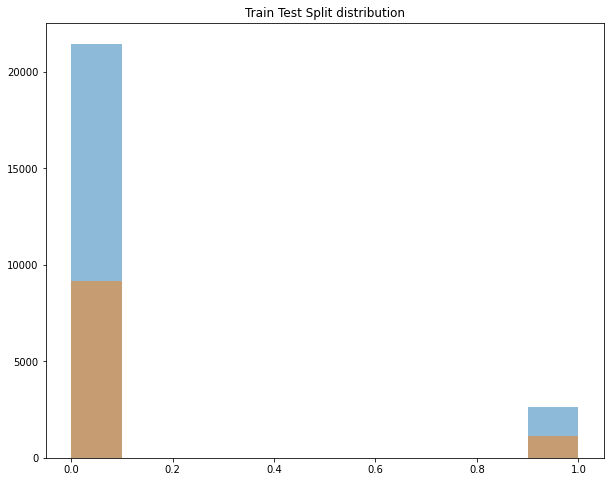

In [178]:
plt.figure(figsize=(10,8))
plt.hist(y_train, alpha=0.5)
plt.hist(y_test,alpha=0.5)
plt.title('Train Test Split distribution');

In [179]:
#from sklearn.model_selection import StratifiedKFold
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)

###Logistic Regression

In [180]:
pipe= Pipeline([('preprocessing', StandardScaler()),  ('classifier', LogisticRegression(C=1,max_iter=1000))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
grid.best_params_

{'classifier__C': 1}

###LinearSVC

In [181]:

# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC

pipe_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])
#pipe_2 = Pipeline([('preprocessing', preprocess_pipeline), ('classifier', LinearSVC(C=1))])
param_grid_2 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.1}

### DecisionTree

In [182]:
from sklearn.tree import DecisionTreeClassifier

pipe_3 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}


grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_depth': 9,
 'classifier__max_leaf_nodes': 15,
 'classifier__min_samples_split': 2,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

### RandomForest

In [183]:
# from sklearn.ensemble import RandomForestClassifier

pipe_4 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_4 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 50}

### BaggingClassifier

In [ ]:
# from sklearn.ensemble import BaggingClassifier

pipe_5 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [10,20]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_samples': 20, 'classifier__n_estimators': 50}

### AdaBoostClassifier

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

pipe_6 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', AdaBoostClassifier(
                        DecisionTreeClassifier(max_depth=1), 
                        n_estimators=1, learning_rate=0.5, 
                        algorithm="SAMME.R", random_state=42)
                   )
                  ])


param_grid_6 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1],
              'classifier__base_estimator__max_depth':[1,5,7,10]
             }

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__base_estimator__max_depth': 5,
 'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 200}

### ExtraTrees

In [ ]:

# from sklearn.ensemble import ExtraTreesClassifier

pipe_7 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 10}

### GradientBoosting

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

pipe_8 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_8 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}

### XGBoost

In [ ]:
# import xgboost

pipe_9 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_9 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.5, 'classifier__n_estimators': 100}

## Models

In [184]:
# from sklearn import  metrics

models = []

models.append(('LogisticRegression', grid.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('DecisionTree', grid_3.best_estimator_))
models.append(('RandomForest', grid_4.best_estimator_))
# models.append(('BaggingClassifier', grid_5.best_estimator_))
# models.append(('AdaBoost', grid_6.best_estimator_))
# models.append(('ExtraTrees', grid_7.best_estimator_))
# models.append(('GradientBoosting', grid_8.best_estimator_))
# models.append(('XGBoost', grid_9.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))
    elif (name == 'Vo hard'):
        pass
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
    elif (name == 'Vo hard'):
        roc_auc_score.append(0)
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))
    print()

LogisticRegression
precision_score: 0.6355353075170843
recall_score: 0.24176776429809357
f1_score: 0.3502824858757062
accuracy_score: 0.8998063891577929
roc_auc_score: 0.7908355135618651

SVM linear
precision_score: 0.6484560570071259
recall_score: 0.2365684575389948
f1_score: 0.3466666666666667
accuracy_score: 0.9003872216844143
roc_auc_score: 0.7884656246647497

DecisionTree
precision_score: 0.6145833333333334
recall_score: 0.30675909878682844
f1_score: 0.40924855491329487
accuracy_score: 0.9010648596321394
roc_auc_score: 0.7775637107728851

RandomForest
precision_score: 0.664179104477612
recall_score: 0.231369150779896
f1_score: 0.34318766066838047
accuracy_score: 0.9010648596321394
roc_auc_score: 0.7938774612091826



In [185]:
# import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LogisticRegression','SVM linear','DecisionTree','RandomForest'])
#df.insert(loc=0, column='Method', value=['LogisticRegression','SVM linear','DecisionTree','RandomForest','BaggingClassifier','AdaBoost','ExtraTrees','GradientBoosting','XGBoost'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,LogisticRegression,0.635535,0.241768,0.350282,0.899806,0.790836
1,SVM linear,0.648456,0.236568,0.346667,0.900387,0.788466
2,DecisionTree,0.614583,0.306759,0.409249,0.901065,0.777564
3,RandomForest,0.664179,0.231369,0.343188,0.901065,0.793877


LogisticRegression
SVM linear
DecisionTree
RandomForest


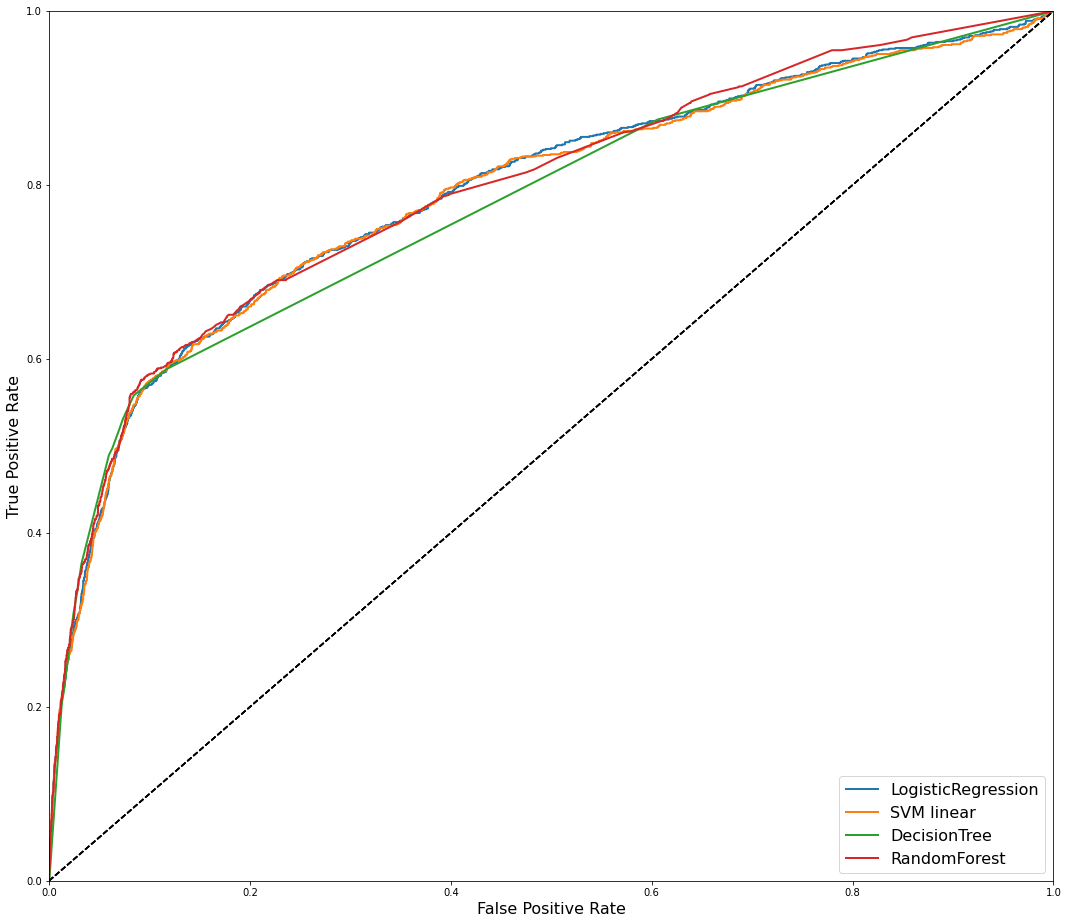

In [186]:
# from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(18, 16))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()

#Scenario 2


In [68]:
### assign data to scenario 2

X_2 = X
y_2 = y

In [ ]:
scaler = StandardScaler()

X_scaled= X_2

In [69]:
### Train Test Split

X_train, X_test, y_train, y_test = train_test_split( X_2, y_2, test_size=0.3, random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (28831, 43) (28831,)
Test set: (12357, 43) (12357,)


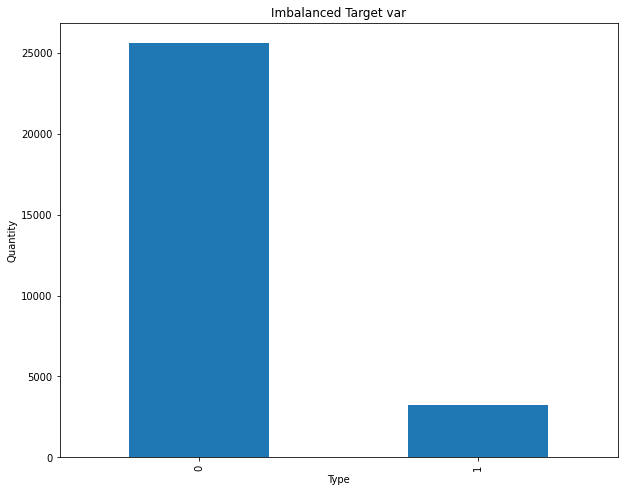

In [70]:
plt.figure(figsize=(10,8))
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title('Imbalanced Target var')
plt.xlabel('Type')
plt.ylabel('Quantity');

In [71]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

confusion_matrix(y_test,y_pred)


array([[10847,   114],
       [ 1284,   112]])

In [72]:
# from sklearn.metrics import classification_report

print(classification_report(y_true=y_test,y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10961
           1       0.50      0.08      0.14      1396

    accuracy                           0.89     12357
   macro avg       0.69      0.53      0.54     12357
weighted avg       0.85      0.89      0.85     12357



In [73]:
# from imblearn.over_sampling import SMOTE

smt =  SMOTE()

X_train, y_train = smt.fit_sample(X_train,y_train,)

print(np.bincount(y_train))

lr = LogisticRegression(max_iter=10000)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)



# print(precision_score(y_test,y_pred))

# print(recall_score(y_test,y_pred))

# accuracy_score(y_test,y_pred)


[25587 25587]


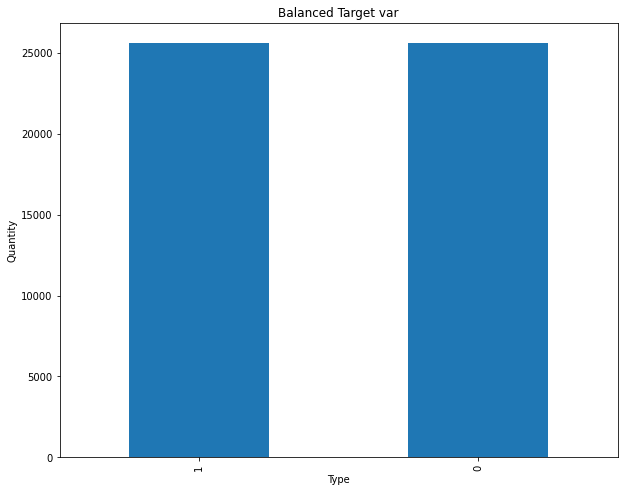

In [74]:
plt.figure(figsize=(10,8))
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title('Balanced Target var')
plt.xlabel('Type')
plt.ylabel('Quantity');

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85     10961
           1       0.27      0.68      0.39      1396

    accuracy                           0.76     12357
   macro avg       0.61      0.72      0.62     12357
weighted avg       0.87      0.76      0.80     12357



In [76]:
confusion_matrix(y_test,y_pred)

array([[8385, 2576],
       [ 444,  952]])

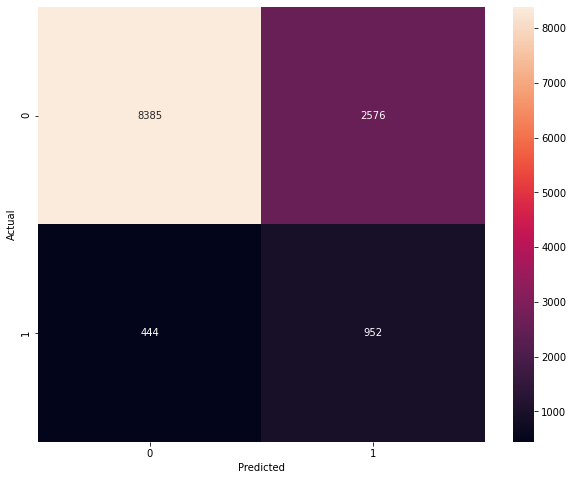

In [77]:
data = {'Actual':y_test.tolist(),'Predicted':y_pred.tolist()}

df = pd.DataFrame(data,columns=['Actual','Predicted'])

confusion_matrix = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True,fmt='d')
plt.show()


In [78]:
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)

###Logistic Regression

In [79]:
pipe= Pipeline([('preprocessing', StandardScaler()),  ('classifier', LogisticRegression(C=1,max_iter=1000))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
grid.best_params_

{'classifier__C': 10}

###LinearSVC

In [80]:

# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC

pipe_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])
#pipe_2 = Pipeline([('preprocessing', preprocess_pipeline), ('classifier', LinearSVC(C=1))])
param_grid_2 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.1}

### DecisionTree

In [81]:
# from sklearn.tree import DecisionTreeClassifier

pipe_3 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}


grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_depth': 11,
 'classifier__max_leaf_nodes': 40,
 'classifier__min_samples_split': 2,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

### RandomForest

In [82]:
# from sklearn.ensemble import RandomForestClassifier

pipe_4 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_4 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 100}

### BaggingClassifier

In [ ]:
# from sklearn.ensemble import BaggingClassifier

pipe_5 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [10,20]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_samples': 20, 'classifier__n_estimators': 100}

### AdaBoostClassifier

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

pipe_6 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', AdaBoostClassifier(
                        DecisionTreeClassifier(max_depth=1), 
                        n_estimators=1, learning_rate=0.5, 
                        algorithm="SAMME.R", random_state=42)
                   )
                  ])


param_grid_6 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1],
              'classifier__base_estimator__max_depth':[1,5,7,10]
             }

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__base_estimator__max_depth': 5,
 'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 100}

### ExtraTrees

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier

pipe_7 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 10}

### GradientBoosting

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

pipe_8 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_8 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__learning_rate': 0.9, 'classifier__n_estimators': 200}

### XGBoost

In [ ]:
# import xgboost

pipe_9 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_9 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.5, 'classifier__n_estimators': 200}

## Models

In [83]:
# from sklearn import  metrics

models = []

models.append(('LogisticRegression', grid.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('DecisionTree', grid_3.best_estimator_))
models.append(('RandomForest', grid_4.best_estimator_))
# models.append(('BaggingClassifier', grid_5.best_estimator_))
# models.append(('AdaBoost', grid_6.best_estimator_))
# models.append(('ExtraTrees', grid_7.best_estimator_))
# models.append(('GradientBoosting', grid_8.best_estimator_))
# models.append(('XGBoost', grid_9.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))
    elif (name == 'Vo hard'):
        pass
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
    elif (name == 'Vo hard'):
        roc_auc_score.append(0)
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))
    print()

LogisticRegression
precision_score: 0.26999432785025523
recall_score: 0.6819484240687679
f1_score: 0.38683462007314096
accuracy_score: 0.7557659626122846
roc_auc_score: 0.7803049245449286

SVM linear
precision_score: 0.2610716238381629
recall_score: 0.6840974212034384
f1_score: 0.3779184804115552
accuracy_score: 0.745569312940034
roc_auc_score: 0.7794713491882787

DecisionTree
precision_score: 0.4554878048780488
recall_score: 0.5351002865329513
f1_score: 0.49209486166007904
accuracy_score: 0.8752124302015052
roc_auc_score: 0.773272502482754

RandomForest
precision_score: 0.3943262411347518
recall_score: 0.5974212034383954
f1_score: 0.4750783252634577
accuracy_score: 0.8508537670955734
roc_auc_score: 0.7911038589800932



In [84]:
# import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
#df.insert(loc=0, column='Method', value=['LogisticRegression','SVM linear','DecisionTree','RandomForest','BaggingClassifier','AdaBoost','ExtraTrees','GradientBoosting','XGBoost'])
df.insert(loc=0, column='Method', value=['LogisticRegression','SVM linear','DecisionTree','RandomForest'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,LogisticRegression,0.269994,0.681948,0.386835,0.755766,0.780305
1,SVM linear,0.261072,0.684097,0.377918,0.745569,0.779471
2,DecisionTree,0.455488,0.535100,0.492095,0.875212,0.773273
3,RandomForest,0.394326,0.597421,0.475078,0.850854,0.791104


LogisticRegression
SVM linear
DecisionTree
RandomForest


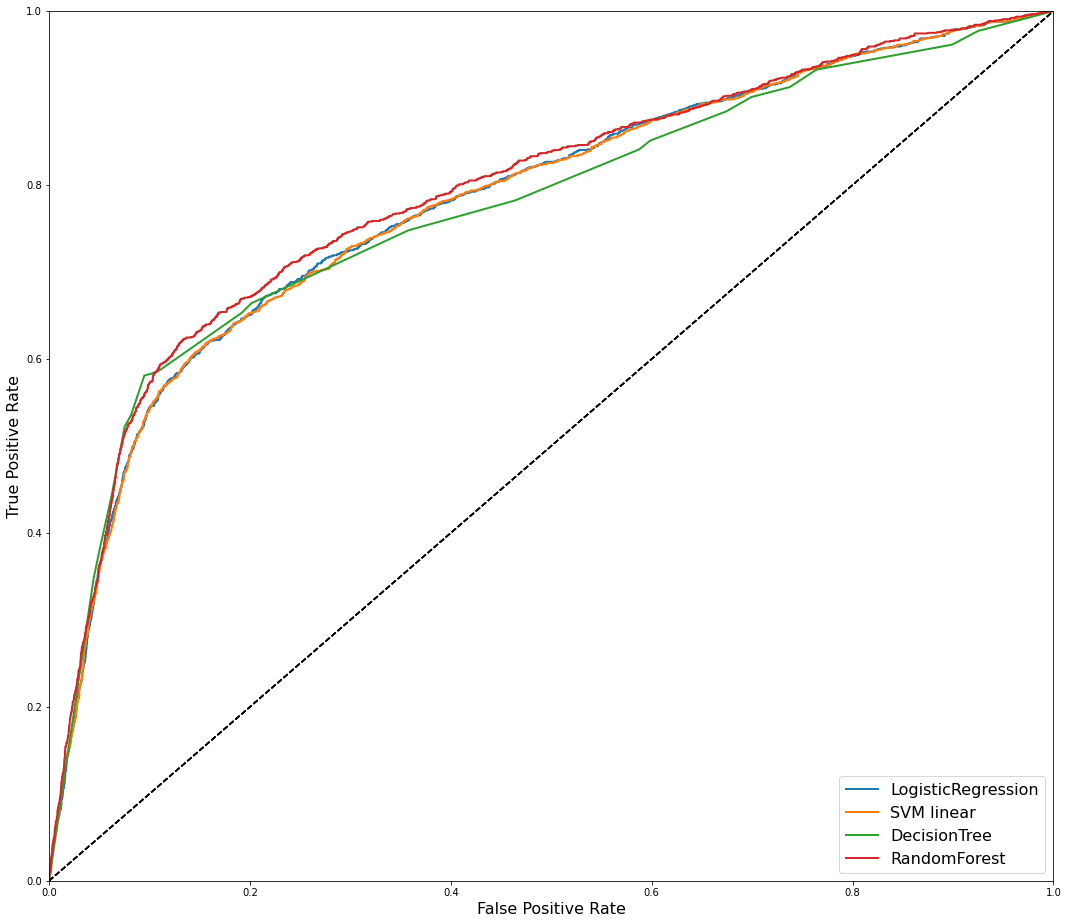

In [85]:
# from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(18, 16))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
# from imblearn.under_sampling import NearMiss

# nr = NearMiss()

# X_train, y_train = nr.fit_sample(X_train,y_train,)

# print(np.bincount(y_train))

# lr = LogisticRegression(max_iter=10000)


# lr.fit(X_train,y_train)

# y_pred = lr.predict(X_test)

# print(confusion_matrix(y_test,y_pred))

# print(precision_score(y_test,y_pred))

# print(recall_score(y_test,y_pred))

# accuracy_score(y_test,y_pred)

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [88]:
LR = LogisticRegression(max_iter=1000)

rfe = RFE(LR,n_features_to_select=10)

rfe_fit =  rfe.fit(X,y)

In [89]:
#No of selected features / selected features

print(f'No. selected features : {rfe_fit.n_features_}')

print(f'Selected features : {rfe_fit.support_}')

print(f'Feature Names: {np.array(features)[rfe_fit.support_]}')

No. selected features : 10
Selected features : [False  True False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False  True  True  True  True  True  True
 False  True  True False False False False]
Feature Names: ['euribor3m' 'education_illiterate' 'month_aug' 'month_dec' 'month_jul'
 'month_jun' 'month_mar' 'month_may' 'month_oct' 'month_sep']


In [96]:
scaler = StandardScaler()

X_scaled= X_1

In [98]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=123,n_jobs=-1)

clf_model = clf.fit(X_scaled,y_1)

In [99]:
importances = clf_model.feature_importances_

importances

array([2.57402473e-01, 2.56641955e-01, 1.20955530e-02, 6.81827948e-03,
       5.78941046e-03, 1.26907264e-02, 8.04171305e-03, 8.28412182e-03,
       1.07768097e-02, 7.28999982e-03, 1.80480626e-02, 6.89138982e-03,
       2.49086089e-03, 2.07380053e-02, 1.53129057e-02, 9.33412160e-04,
       7.18369071e-03, 1.17077032e-02, 1.72718816e-02, 3.11994875e-04,
       1.24567718e-02, 1.55282508e-02, 8.19107435e-03, 1.58605879e-06,
       1.45539399e-02, 5.00042599e-02, 4.16597776e-03, 3.16746406e-02,
       4.10956562e-03, 2.05151330e-02, 6.84919887e-03, 3.58365114e-03,
       7.63545950e-03, 1.22376176e-02, 1.30861787e-02, 1.05366054e-02,
       6.57339233e-03, 1.25505437e-02, 8.60708528e-03, 1.77297060e-02,
       1.68879466e-02, 1.72795213e-02, 1.85209452e-02])

In [1]:
indicies = np.argsort(importances)[::-1]

f_names = [dataset.columns[i] for i in indicies]

plt.figure(figsize=(15,8))

plt.title('Feature Importance')

plt.bar(range(X.shape[1]), importances[indicies])

plt.xticks(range(X.shape[1]), f_names, rotation=90)

plt.show()

NameError: ignored

In [ ]:
# corr = dataset.corr()
# plt.figure(figsize=(30,20))
# sns.heatmap(data=corr,annot=True,cmap='winter')